# **Convolutional Neaural Network (CNN) Image Classifier**

# **1. SET UP & LOADING DATA**

## Set up

In [69]:
import tensorflow as tf
import os

In [70]:
# Avoid OutOfMemory(OOM) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

### Remove Ambiguous Images

In [71]:
import cv2
import imghdr

In [72]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/data'
data_dir

'/content/drive/MyDrive/Colab Notebooks/data'

In [73]:
os.listdir(data_dir)

# If I want to access each picture in the happy folder:
# os.listdir(os.path.join(data_dir, 'happy'))

['sad', 'happy']

In [74]:
image_exts = ['jpeg', 'jpg', 'bmp','png']

In [75]:
# looping through every folder we have in data directory
for image_class in os.listdir(data_dir):
  # looping through every image in that folder
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      # os.remove(image_path)

## Load Data

In [76]:
tf.data.Dataset??

In [77]:
import numpy as np
from matplotlib import pyplot as plt

In [108]:
# Building our data pipeline
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/data')

Found 165 files belonging to 2 classes.


In [86]:
# Allowing to access our data pipeline
data_iterator = data.as_numpy_iterator()

In [96]:
# Actually accessing our datapipeline
batch = data_iterator.next() # get another batch from iterator

In [97]:
# Images represented as NumPy arrays
batch[0].shape

(32, 256, 256, 3)

In [98]:
# Class 1 = SAD PPL
# Class 0 = HAPPY PPL
batch[1]

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)

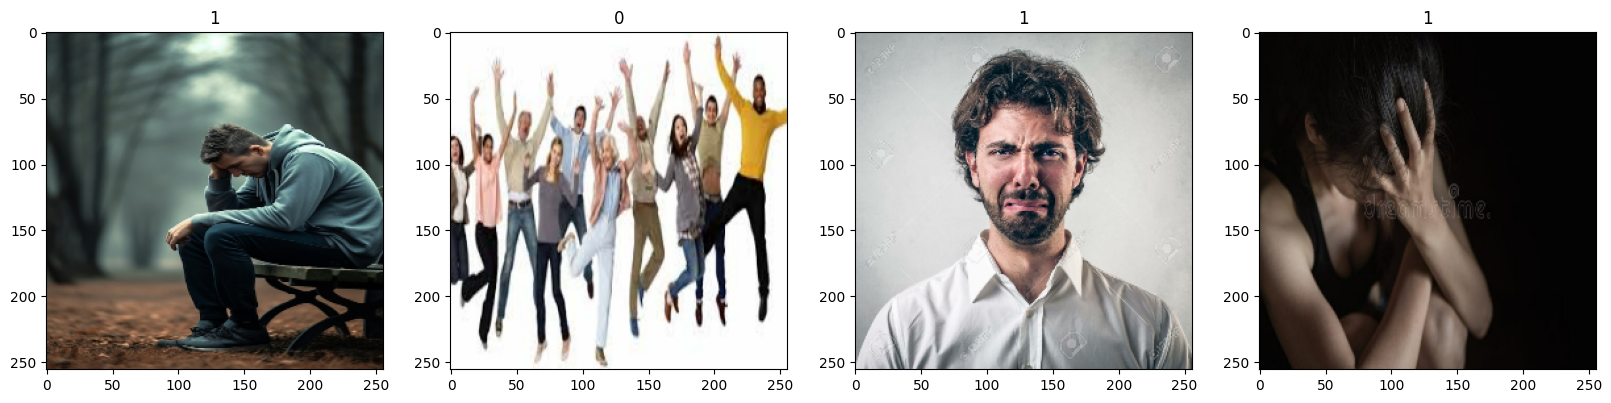

In [99]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# **2. PREPROCESSING DATA**

## Scale Data

In [109]:
data = data.map(lambda x,y: (x/255, y))

In [110]:
scaled_iterator = data.as_numpy_iterator()

In [111]:
batch = scaled_iterator.next()

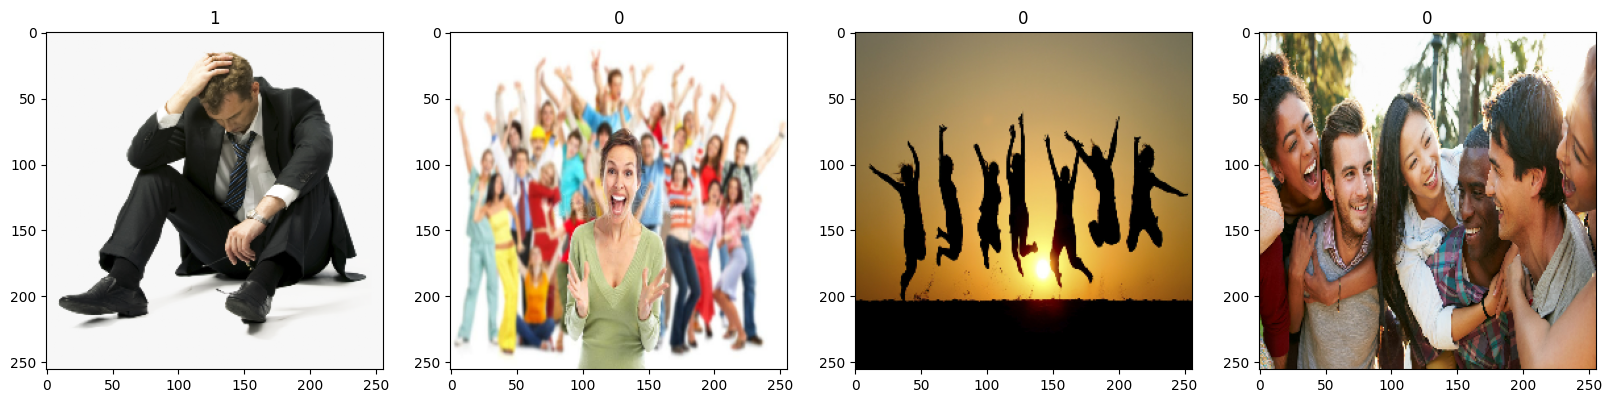

In [112]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

## Split Data

In [115]:
len(data)

6

In [130]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [132]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [136]:
len(test)

1

# **3. DEEP MODEL**

## Build Deep Learning Model

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [146]:
model = Sequential()

In [148]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [149]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [150]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train

In [151]:
logdir = 'logs'

In [154]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [156]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 12s 2s/step - loss: 0.6763 - accuracy: 0.5521 - val_loss: 0.6647 - val_accuracy: 0.5781
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.6630 - accuracy: 0.5729 - val_loss: 0.6418 - val_accuracy: 0.5938
Epoch 3/20
3/3 [==============================] - 5s 1s/step - loss: 0.6669 - accuracy: 0.5417 - val_loss: 0.6612 - val_accuracy: 0.6562
Epoch 4/20
3/3 [==============================] - 6s 1s/step - loss: 0.6453 - accuracy: 0.6146 - val_loss: 0.6563 - val_accuracy: 0.5469
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.6957 - accuracy: 0.5417 - val_loss: 0.6422 - val_accuracy: 0.5625
Epoch 6/20
3/3 [==============================] - 8s 3s/step - loss: 0.6385 - accuracy: 0.6771 - val_loss: 0.6803 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: 0.6690 - accuracy: 0.5729 - val_loss: 0.6211 - val_accuracy: 0.8125
Epoch 8/20
3/3 [========================

## Plot Performance

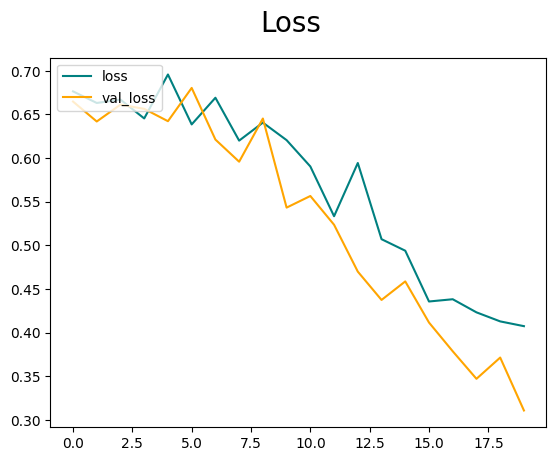

In [157]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

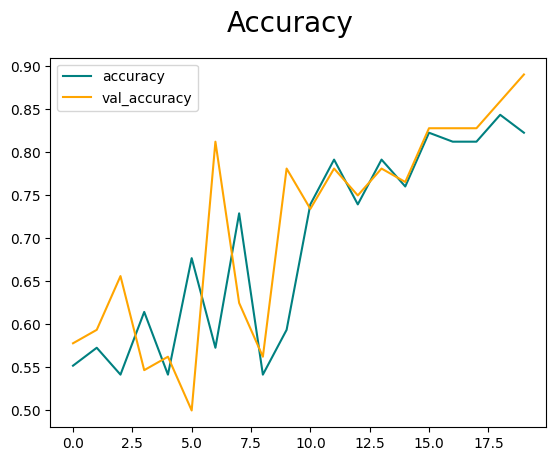

In [158]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# **4. EVALUATE PERFORMANCE**

## Evaluate

In [159]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [160]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [161]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 421ms/step


In [162]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.5, Accuracy:0.800000011920929


## Test

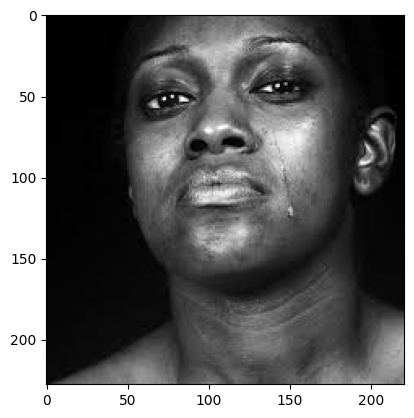

In [172]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/test/sadtest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

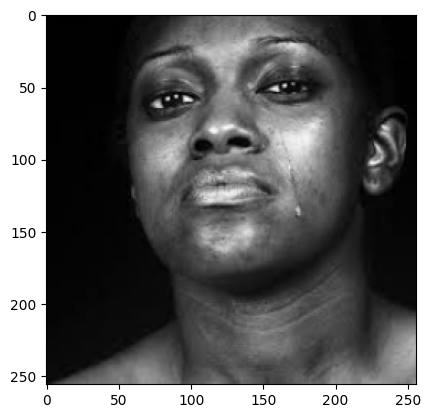

In [173]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [174]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [175]:
yhat

array([[0.94617045]], dtype=float32)

In [176]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Sad


# **5. SAVE THE MODEL**

In [177]:
from tensorflow.keras.models import load_model

In [178]:
model.save(os.path.join('models', 'happysadmodel.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [179]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [182]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


In [183]:
if yhat_new > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Sad
